In [1]:
##Import packages
import csv
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reading the data directly from the google mobility site
link = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
df = pd.read_csv(link)

/Users/mayuoji/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#Checking data structure and end_date
df.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
3080828,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-04,NaN,NaN,NaN,NaN,12.0,NaN
3080829,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-05,NaN,NaN,NaN,NaN,10.0,NaN
3080830,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-06,NaN,NaN,NaN,NaN,14.0,NaN
3080831,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-09,NaN,NaN,NaN,NaN,3.0,NaN
3080832,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-10,NaN,NaN,NaN,NaN,9.0,NaN


## by central city

In [3]:
##by major city
#select city
#london(city)
df1 = df[(df['sub_region_1']=="Greater London")&(df['sub_region_2']=="City of London")]
df1['City']="London(city)"

#newyork
df2 = df[(df['sub_region_1']=="New York")&(df['sub_region_2']=="New York County")]
df2['City']="New York(NYC)"

#paris
df3 = df[df['iso_3166_2_code']=="FR-IDF"]
df3['City']="Paris"

#frunk
df4 = df[df['sub_region_1']=="Hessen"]
df4['City']="Frunkfrut"

#tokyo
df5 = df[df['sub_region_1']=="Tokyo"]
df5['City']="Tokyo"

#merge
dff=pd.concat([df1,df2,df3,df4,df5])
dff=dff.iloc[:,7:15]
dff=dff.interpolate()

#moving average
dff = dff.set_index('date')
dff.index = pd.to_datetime(dff.index, format='%Y-%m-%d')
office = dff.groupby('City')['workplaces_percent_change_from_baseline'].rolling(7).mean().reset_index()
stations=dff.groupby('City')['transit_stations_percent_change_from_baseline'].rolling(7).mean().reset_index()
retail_recreation=dff.groupby('City')['retail_and_recreation_percent_change_from_baseline'].rolling(7).mean().reset_index()
grocery_and_pharmacy=dff.groupby('City')['grocery_and_pharmacy_percent_change_from_baseline'].rolling(7).mean().reset_index()
parks=dff.groupby('City')['parks_percent_change_from_baseline'].rolling(7).mean().reset_index()



<ipython-input-3-af789e1dc689>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['City']="London(city)"
<ipython-input-3-af789e1dc689>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['City']="New York(NYC)"
<ipython-input-3-af789e1dc689>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

## by city_retail and recreation

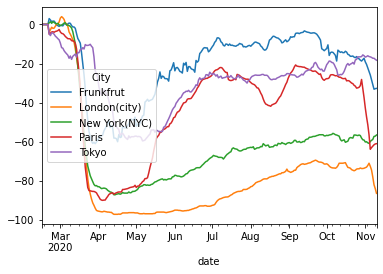

In [4]:
retail_recreation.groupby(['date','City']).sum()['retail_and_recreation_percent_change_from_baseline'].unstack().plot()

## by city_office

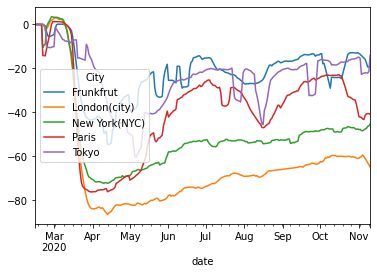

In [5]:
office.groupby(['date','City']).sum()['workplaces_percent_change_from_baseline'].unstack().plot()

## by country

In [6]:
#select data
# select no subcategory data
df1=df[df['sub_region_1'].isnull()] 
# select country
df2=df1[(df1['country_region']=="United Kingdom")|(df1['country_region']=="France")|(df1['country_region']=="Germany")|(df1['country_region']=="Spain")|(df1['country_region']=="Italy")]                                                   
df2=df2.interpolate()

#movig avaraged
df2 = df2.set_index('date')
df2.index = pd.to_datetime(df2.index, format='%Y-%m-%d')
office = df2.groupby('country_region')['workplaces_percent_change_from_baseline'].rolling(7).mean().reset_index()
stations=df2.groupby('country_region')['transit_stations_percent_change_from_baseline'].rolling(7).mean().reset_index()
retail_recreation=df2.groupby('country_region')['retail_and_recreation_percent_change_from_baseline'].rolling(7).mean().reset_index()
grocery_and_pharmacy=df2.groupby('country_region')['grocery_and_pharmacy_percent_change_from_baseline'].rolling(7).mean().reset_index()
parks=df2.groupby('country_region')['parks_percent_change_from_baseline'].rolling(7).mean().reset_index()

## by country_retail and recreation

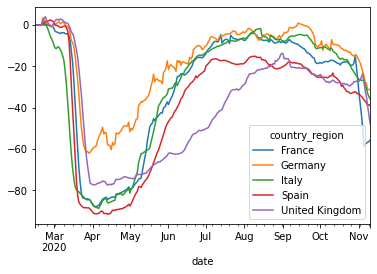

In [7]:
retail_recreation.groupby(['date','country_region']).sum()['retail_and_recreation_percent_change_from_baseline'].unstack().plot()

## by country_office

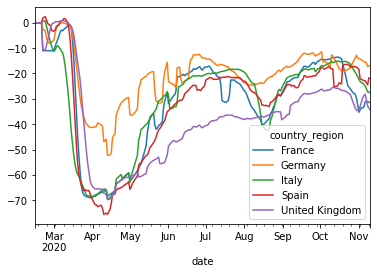

In [8]:
office.groupby(['date','country_region']).sum()['workplaces_percent_change_from_baseline'].unstack().plot()